In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from comet_ml import API
import pandas as pd
import joblib
from src.features.q3_plots import *
import src.features.feature_engineering_2 as feng2

In [2]:
from dotenv import load_dotenv
load_dotenv()

# Initialise comet API
api = API()

In [3]:
def separate_games(df):
    # Convert gameID to string for easy slicing
    df['gameID'] = df['gameID'].astype(str)

    regular_season_df = df[df['gameID'].str.slice(4, 6) == '02']
    playoffs_df = df[df['gameID'].str.slice(4, 6) == '03']

    regular_season_df.reset_index(drop=True, inplace = True)
    playoffs_df.reset_index(drop=True, inplace = True)
    return regular_season_df, playoffs_df

In [5]:
def test_model(api, experiment_name, model_name, X_test, y_test):
    
    experiment = api.get(f"tedoul/ift6758-project/{experiment_name}")    
    experiment.download_model(model_name, output_path="data/models/", expand=True)

    model_path = f"data/models/{model_name}.joblib"
    model = joblib.load(model_path)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    return y_test, y_pred_proba

### Regression lineaire modele 1

In [6]:
# Load test set
data = pd.read_csv('../data/datasets/csv_files/2020-v2.csv')
seasons_data, playoffs_data = separate_games(data)

X_seasons_data, y_seasons_data = seasons_data["distance_to_net"].values, seasons_data["is_goal"].values
X_playoffs_data, y_playoffs_data = playoffs_data["distance_to_net"].values, playoffs_data["is_goal"].values

X_seasons_data = X_seasons_data.reshape(X_seasons_data.shape[0], 1)
X_playoffs_data = X_playoffs_data.reshape(X_playoffs_data.shape[0], 1)

In [9]:
y_test_seasons_data1, y_pred_proba_seasons_data1 = test_model(api, 'logit_distance', 'logit_distance', X_seasons_data, y_seasons_data)
y_playoffs_data1, y_pred_proba_playoffs_data1 = test_model(api, 'logit_distance', 'logit_distance', X_playoffs_data, y_playoffs_data)

COMET INFO: Downloading experiment model 'logit_distance' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!
COMET INFO: Downloading experiment model 'logit_distance' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!


### Regression lineaire modele 2

In [10]:
data = pd.read_csv('../data/datasets/csv_files/2020-v2.csv')
seasons_data, playoffs_data = separate_games(data)

X_seasons_data, y_seasons_data = seasons_data["shot_angle"].values, seasons_data["is_goal"].values
X_playoffs_data, y_playoffs_data = playoffs_data["shot_angle"].values, playoffs_data["is_goal"].values

X_seasons_data = X_seasons_data.reshape(X_seasons_data.shape[0], 1)
X_playoffs_data = X_playoffs_data.reshape(X_playoffs_data.shape[0], 1)

In [11]:
y_test_seasons_data2, y_pred_proba_seasons_data2 = test_model(api, 'logit_angle', 'logit_angle', X_seasons_data, y_seasons_data)
y_playoffs_data2, y_pred_proba_playoffs_data2 = test_model(api, 'logit_angle', 'logit_angle', X_playoffs_data, y_playoffs_data)

COMET INFO: Downloading experiment model 'logit_angle' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!
COMET INFO: Downloading experiment model 'logit_angle' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!


### Regression lineaire modele 3

In [13]:
data = pd.read_csv('../data/datasets/csv_files/2020-v2.csv')
seasons_data, playoffs_data = separate_games(data)

X_seasons_data, y_seasons_data = seasons_data[["distance_to_net", "shot_angle"]].values, seasons_data["is_goal"].values
X_playoffs_data, y_playoffs_data = playoffs_data[["distance_to_net", "shot_angle"]].values, playoffs_data["is_goal"].values

In [14]:
y_test_seasons_data3, y_pred_proba_seasons_data3 = test_model(api, 'logit_dist_angle', 'logit_dist_angle', X_seasons_data, y_seasons_data)
y_playoffs_data3, y_pred_proba_playoffs_data3 = test_model(api, 'logit_dist_angle', 'logit_dist_angle', X_playoffs_data, y_playoffs_data)

COMET INFO: Downloading experiment model 'logit_dist_angle' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!
COMET INFO: Downloading experiment model 'logit_dist_angle' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!


### XGB Meilleur modele

In [16]:
# Load test set
data = pd.read_csv('../data/datasets/csv_files/2020-v2.csv')
seasons_data, playoffs_data = separate_games(data)

X_season, y_season = feng2.select_features(seasons_data)
X_playoffs, y_playoffs = feng2.select_features(playoffs_data)

c:\Users\Ulrich TEDONGMO\miniconda3\envs\IFT6758-Project\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Ulrich TEDONGMO\miniconda3\envs\IFT6758-Project\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
# Evaluate model on test set
y_test_seasons_data4, y_pred_proba_seasons_data4 = test_model(api, 'xgb_hypertuned_f1', 'xgb_hypertuned', X_season, y_season)
y_playoffs_data4, y_pred_proba_playoffs_data4 = test_model(api, 'xgb_hypertuned_f1', 'xgb_hypertuned', X_playoffs, y_playoffs)

COMET INFO: Downloading experiment model 'xgb_hypertuned' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!
COMET INFO: Downloading experiment model 'xgb_hypertuned' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!


### Meilleure modele

In [19]:
import src.features.feature_selection as fsel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('../data/datasets/csv_files/2016-2019-v2.csv')
df = fsel.remove_nan_from_strength(df)
categorical_columns_1 = ["period_type","attacking_team_name","shooter","goalie","rebound","last_event_type","home_team",]
shot_type_classified = [["Wrap-around", 0],["Slap Shot", 1],["Snap Shot", 2],["Wrist Shot", 3],["Backhand", 4],["Deflected", 5],["Tip-In", 6],]

strength_classified = [["Short Handed", 0], ["Even", 1], ["Power Play", 2]]

df = df.dropna()
df = fsel.encode_categorical_features(df, categorical_columns_1, shot_type_classified, strength_classified)

X = df.drop(columns=["is_goal", "period_time"])
Y = df["is_goal"]

    # On récupère le dataset avec les K-meilleures caractéristiques
X_Kbest, Kbest_features = fsel.get_features_KBest(X, Y, 10)

X_train, X_val, y_train, y_val = train_test_split(
        X_Kbest, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

c:\Users\Ulrich TEDONGMO\miniconda3\envs\IFT6758-Project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Ulrich TEDONGMO\miniconda3\envs\IFT6758-Project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [25]:
# Load test set
data = pd.read_csv('../data/datasets/csv_files/2020-v2.csv')
data = fsel.remove_nan_from_strength(data)

data = data.dropna()
data = fsel.encode_categorical_features(data, categorical_columns_1, shot_type_classified, strength_classified)

seasons_data, playoffs_data = separate_games(data)

X_season = seasons_data.drop(columns=["is_goal", "period_time"])
y_season = seasons_data["is_goal"]

X_playoffs = playoffs_data.drop(columns=["is_goal", "period_time"])
y_playoffs = playoffs_data["is_goal"]

X_season = X_season[Kbest_features]
X_playoffs = X_playoffs[Kbest_features]

X_season_scaled = scaler.transform(X_season)
X_playoffs_scaled = scaler.transform(X_playoffs)


In [26]:
# Evaluate model on test set
y_test_seasons_data5, y_pred_proba_seasons_data5 = test_model(api, 'mlp_hypertuned_KBest', 'mlp_hypertuned_KBest', X_season_scaled, y_season)
y_playoffs_data5, y_pred_proba_playoffs_data5 = test_model(api, 'mlp_hypertuned_KBest', 'mlp_hypertuned_KBest', X_playoffs_scaled, y_playoffs)

COMET INFO: Downloading experiment model 'mlp_hypertuned_KBest' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!
COMET INFO: Downloading experiment model 'mlp_hypertuned_KBest' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!


Saison régulière

In [36]:
list_y_val_seasons = [y_test_seasons_data1, y_test_seasons_data2, y_test_seasons_data3, y_test_seasons_data4.values, y_test_seasons_data5.values]
list_y_proba_seasons = [y_pred_proba_seasons_data1, y_pred_proba_seasons_data2, y_pred_proba_seasons_data3, y_pred_proba_seasons_data4, y_pred_proba_seasons_data5]
models = ['RL sur la distance du but', 'RL sur l\'angle de tir', 'RL sur la distance but + Angle de tir', 'Best XGBoost', 'Best MLPClassifier']

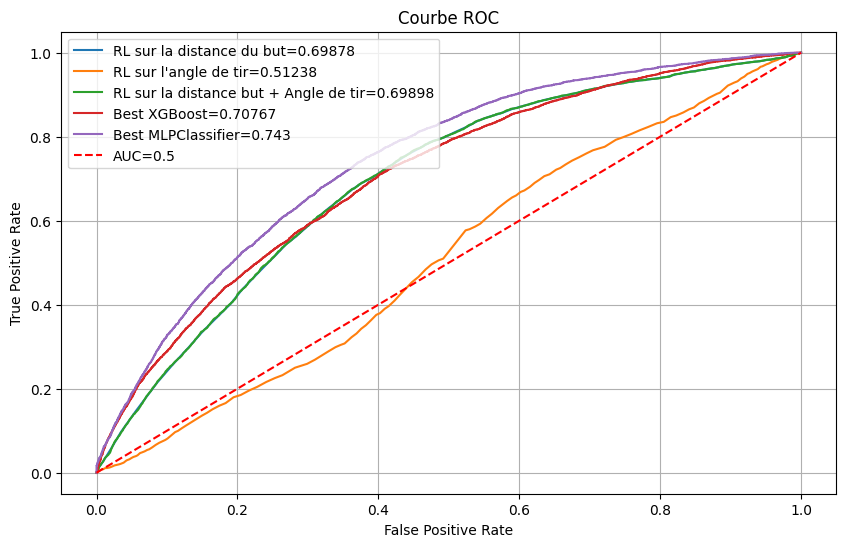

In [37]:
plot_all_roc_curve(list_y_val_seasons, list_y_proba_seasons, models)

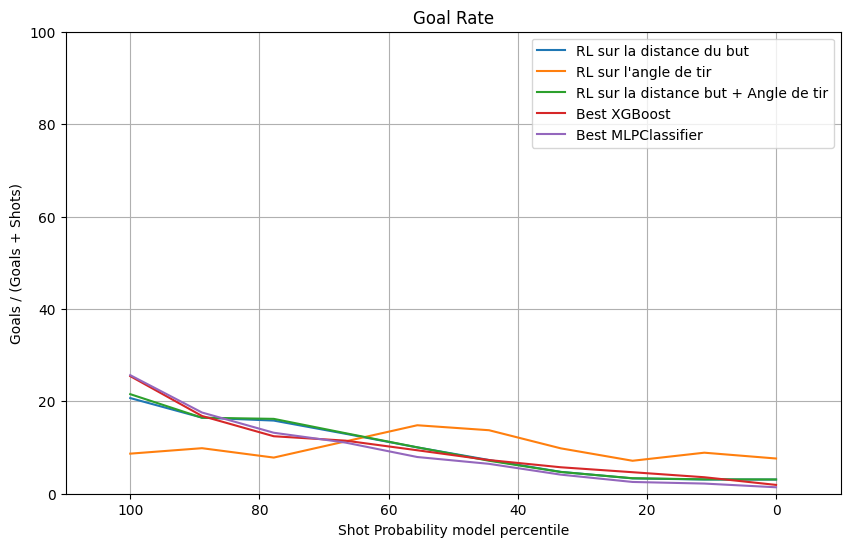

In [38]:
plot_all_goal_rate(list_y_val_seasons, list_y_proba_seasons, models)

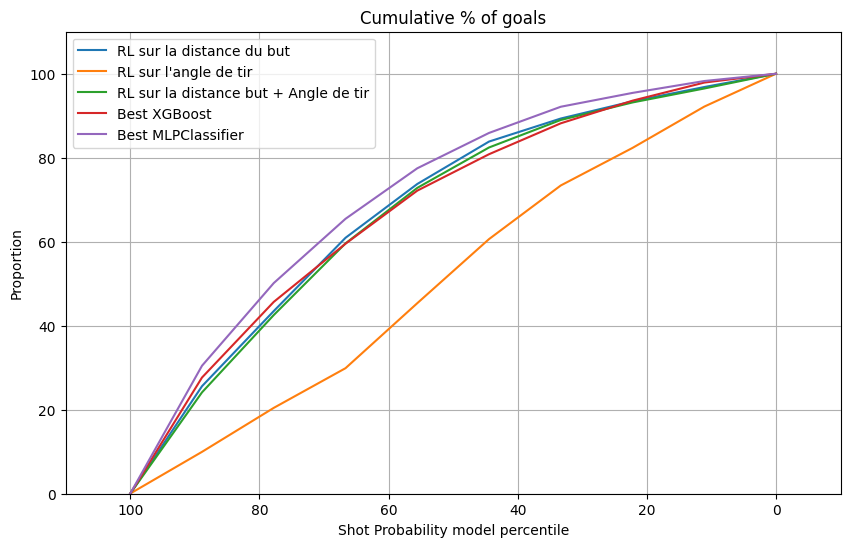

In [39]:
plot_all_cumulative_percent_goal(list_y_val_seasons, list_y_proba_seasons, models)

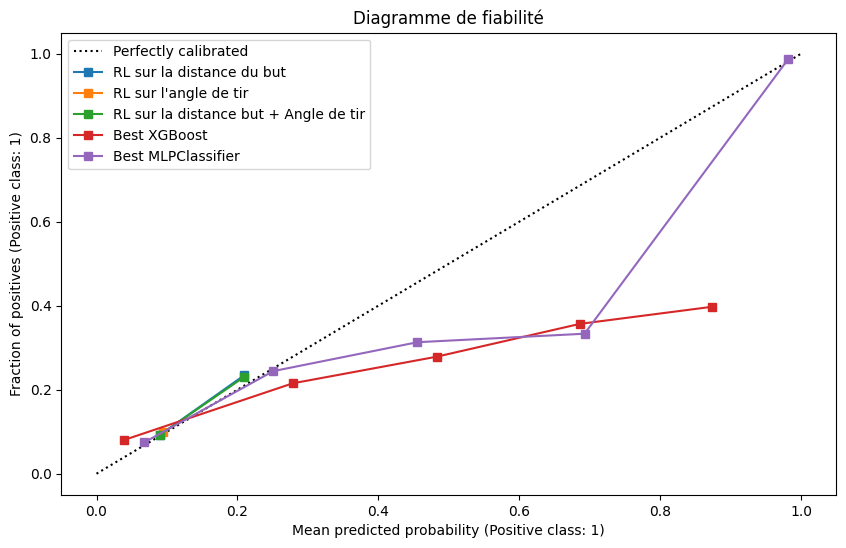

In [40]:
plot_all_fiability_diagram(list_y_val_seasons, list_y_proba_seasons, models)

Playoffs

In [41]:
list_y_val_playsoffs = [y_playoffs_data1, y_playoffs_data2, y_playoffs_data3, y_playoffs_data4.values, y_playoffs_data5.values]
list_y_proba_playsoffs = [y_pred_proba_playoffs_data1, y_pred_proba_playoffs_data2, y_pred_proba_playoffs_data3, y_pred_proba_playoffs_data4, y_pred_proba_playoffs_data5]

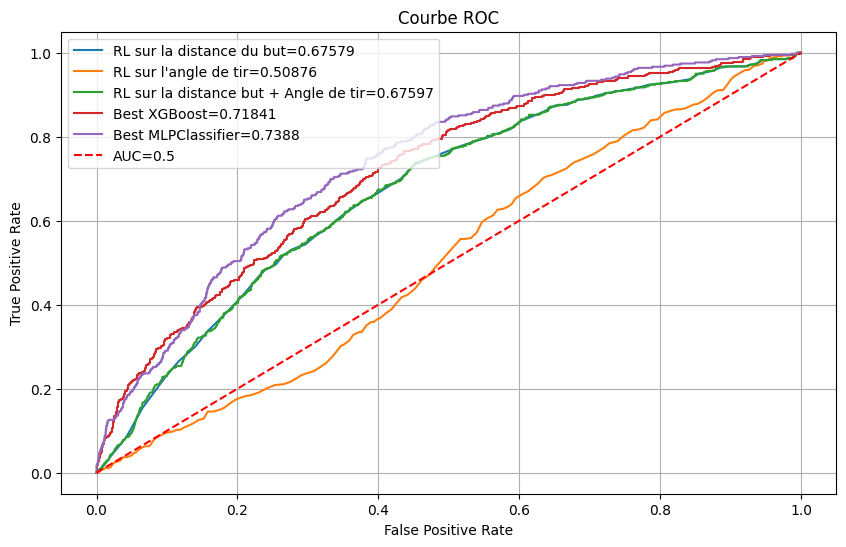

In [42]:
plot_all_roc_curve(list_y_val_playsoffs, list_y_proba_playsoffs, models)

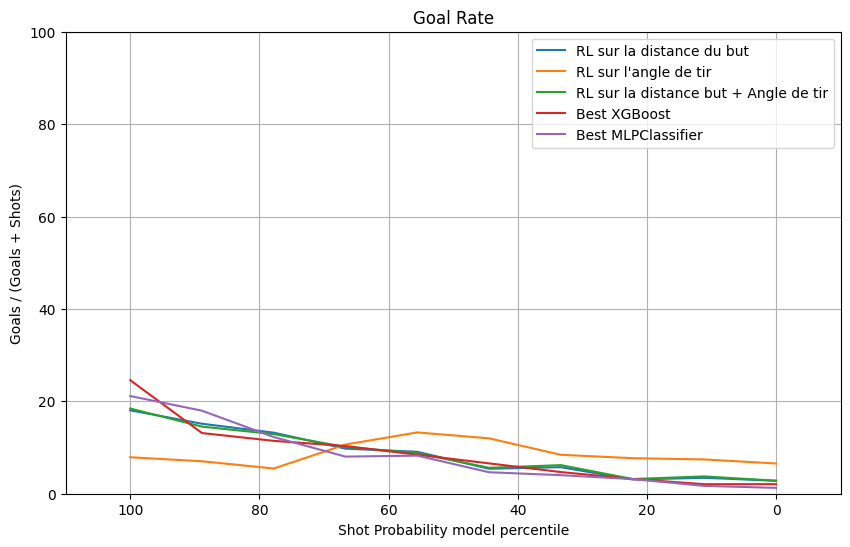

In [43]:
plot_all_goal_rate(list_y_val_playsoffs, list_y_proba_playsoffs, models)

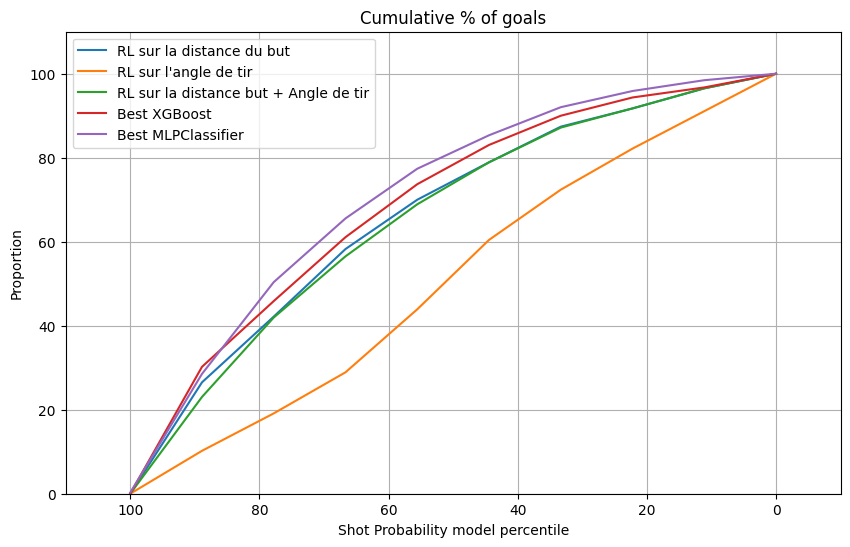

In [44]:
plot_all_cumulative_percent_goal(list_y_val_playsoffs, list_y_proba_playsoffs, models)

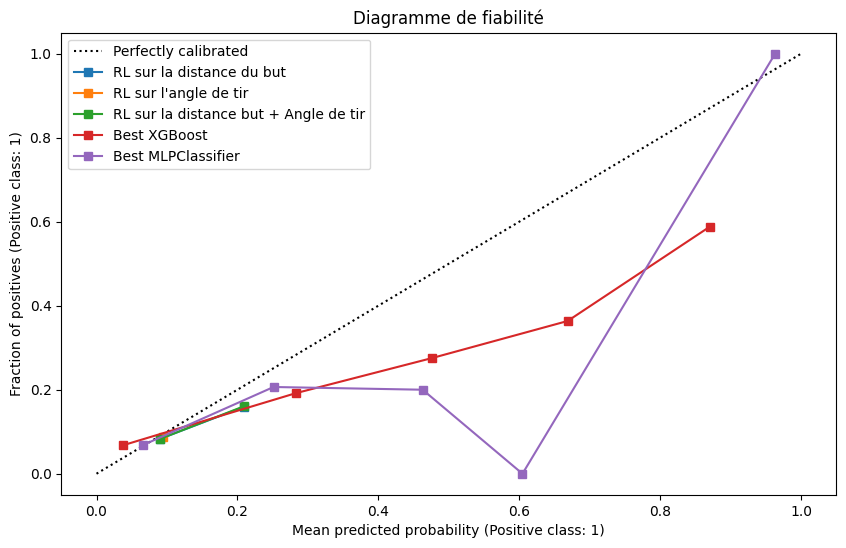

In [45]:
plot_all_fiability_diagram(list_y_val_playsoffs, list_y_proba_playsoffs, models)